In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pred_o = pickle.load(open("pred.pck", "rb"))
y_test_o = pickle.load(open("y_test.pck", "rb"))

pred = np.array([])
y_test = np.array([])
for i in range(len(y_test_o)):
    if y_test_o[i] < 1005:
        y_test = np.append(y_test, y_test_o[i])
        pred = np.append(pred, pred_o[i])

In [4]:
print(len(y_test))
print(len(pred))

1209
1209


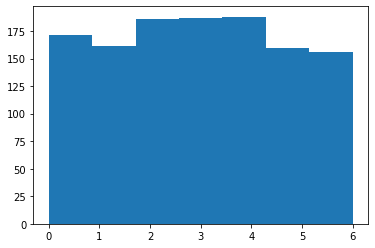

In [5]:

plt.hist(y_test, bins=7)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.savefig("y_test_histogram.png")

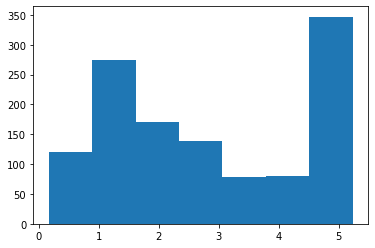

In [6]:
plt.hist(pred, bins=7)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency')
plt.savefig("predictions_histogram.png")

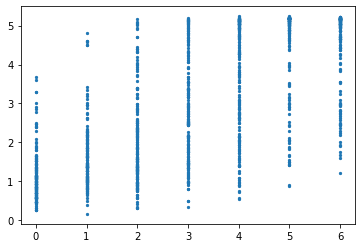

In [7]:
plt.scatter(y_test, pred, s=5)
plt.savefig("pred_scatter.png")

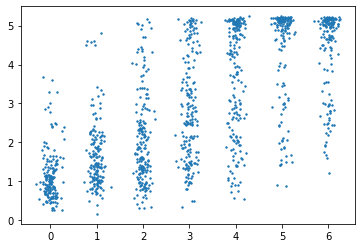

In [8]:
plt.scatter(y_test + np.random.normal(0, 0.1, y_test.shape[0]), pred, s=2)
plt.savefig("pred_scatter_noise.png")

In [62]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=100)
#pred.reshape(-1, 1)
neigh.fit(pred.reshape(-1, 1), y_test)


#Cela retourne la probabilité du nombre d'erreur étant donné l'output du NN
def proba_erreur(val):
    #val = valeur donné par le NN étant donné une phrase
    #retourne la probabilité pour chaque nombre d'erreur
    val = np.array([val])
    val = val.reshape(1, -1)
    
    probs = neigh.predict_proba(val)
    for i in range(len(probs[0])):
        print(str(i) + " : " + str(int(probs[0][i]*100)), end=", ")
    print()


In [63]:
for i in range(7):
    print(str(i) + ") ", end="")
    proba_erreur(i)

0) 0 : 59, 1 : 15, 2 : 17, 3 : 5, 4 : 4, 5 : 0, 6 : 0, 
1) 0 : 34, 1 : 28, 2 : 18, 3 : 9, 4 : 8, 5 : 2, 6 : 0, 
2) 0 : 7, 1 : 26, 2 : 19, 3 : 21, 4 : 16, 5 : 8, 6 : 3, 
3) 0 : 6, 1 : 9, 2 : 15, 3 : 25, 4 : 19, 5 : 11, 6 : 15, 
4) 0 : 2, 1 : 0, 2 : 17, 3 : 23, 4 : 31, 5 : 10, 6 : 17, 
5) 0 : 0, 1 : 0, 2 : 5, 3 : 12, 4 : 28, 5 : 25, 6 : 30, 
6) 0 : 0, 1 : 0, 2 : 1, 3 : 3, 4 : 12, 5 : 50, 6 : 34, 


[1.1599844005721354, 1.66361110217823, 2.0819554612521203, 2.8764916315754467, 3.6644965720937606, 4.383411238715053, 4.387802252402673]


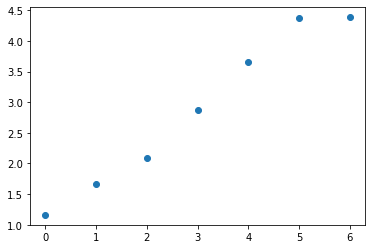

In [17]:
val_pred = [0, 0, 0, 0, 0, 0, 0]
total = [0, 0, 0, 0, 0, 0, 0]
for i in range(len(pred)):
    val_pred[int(y_test[i])] += pred[i]
    total[int(y_test[i])] += 1
    

for i in range(len(val_pred)):
    val_pred[i] /= total[i]

plt.scatter([0, 1, 2, 3, 4, 5, 6], val_pred)
plt.savefig("scatter_mean.png")
print(val_pred)

Ce qui est en dessous est le brouillon qui m'a servi à équilibrer les données par "classes".

In [160]:
dico = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0}

for i in range(len(y)):
    element = y[i]
    if element in dico:
        dico[element] += 1
    else:
        dico[element] = 1
print(dico)        
"""for k, v in dico.items():
    dico[k] = int(v/len(y) * 100)
print(dico)"""

{0: 523, 1: 523, 2: 523, 3: 523, 4: 523, 5: 523, 6: 523, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}


'for k, v in dico.items():\n    dico[k] = int(v/len(y) * 100)\nprint(dico)'

In [172]:
from sklearn.model_selection import train_test_split
X = []
y = []
with open("../../data/fra7.txt", "r", encoding="utf8") as file:
    for ligne in file:
        ligne = ligne.split("\t")
        X.append(ligne[0])
        y.append(int(ligne[1]))

x = 6
for i in range(len(y)):
    if y[i] > x:
        y[i] = x

max = 523
counter = [523]*(x+1)
X_ = []
y_ = []
for i in range(len(X)):
    val = y[i]
    if counter[val] > 0:
        counter[val] -= 1
        X_.append(X[i])
        y_.append(y[i])

X = X_
y = y_
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Frequency Histogram')]

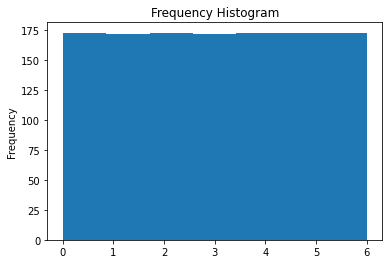

In [173]:
plt.hist(y_test, bins=7)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

In [163]:
for i in range(x):
    print(y.count(1))

523
523
523
523
523
523
